In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.integrate as si
from scipy.integrate import simpson, romberg, trapezoid
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [ ]:
f= lambda x:np.exp(3*x)*np.sin(x)

In [ ]:
def romberg_integration(f, a, b, tol=1e-8, max_iter=10):
    # Inicializar la matriz de Romberg
    R = np.zeros((max_iter, max_iter))

    # Primer término (regla del trapecio con un solo intervalo)
    h = b - a
    R[0, 0] = (h / 2) * (f(a) + f(b))

    for i in range(1, max_iter):
        h /= 2
        # Puntos de evaluación
        x = np.arange(a, b + h, h)
        y = f(x)

        # Regla del trapecio compuesta
        R[i, 0] = 0.5 * R[i-1, 0] + h * np.sum(y[1::2])

        # Extrapolación de Richardson
        for j in range(1, i + 1):
            R[i, j] = (4**j * R[i, j-1] - R[i-1, j-1]) / (4**j - 1)

        # Verificar la convergencia
        if abs(R[i, i] - R[i-1, i-1]) < tol:
            return R[i, i]

    # Si no converge dentro de las iteraciones máximas, devolver el último valor
    return R[-1, -1]


Resultado de la integral: 1.5920977078586134


In [ ]:
# Límites de integración
a = 0
b = np.pi / 4

# Calcular la integral usando el método de Romberg
result = romberg_integration(f, a, b, tol=1e-8, max_iter=10)
print(f"Resultado de la integral: {result}")

Resultado de la integral: 1.5920977078586134


In [ ]:
# Calcular la integral usando scipy.integrate.romberg
result_scipy = romberg(f, a, b, tol=1e-8, show=True)
print(f"Resultado de la integral (scipy.integrate.romberg): {result_scipy}")

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7bfccad4fce0> from [0, 0.7853981633974483]

 Steps  StepSize   Results
     1  0.785398  2.929727 
     2  0.392699  1.952999  1.627423 
     4  0.196350  1.684140  1.594520  1.592326 
     8  0.098175  1.615224  1.592253  1.592101  1.592098 
    16  0.049087  1.597887  1.592107  1.592098  1.592098  1.592098 
    32  0.024544  1.593545  1.592098  1.592098  1.592098  1.592098  1.592098 

The final result is 1.592097707858613 after 33 function evaluations.
Resultado de la integral (scipy.integrate.romberg): 1.592097707858613


<ipython-input-8-7db0dea4e806>:2: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_scipy = romberg(f, a, b, tol=1e-8, show=True)


In [ ]:
from sympy import integrate, symbols, sin, exp, lambdify
import sympy as sp

In [ ]:
#encontramos la integral simbolica
x = symbols('x')
f =exp(3*x)*sin(x)
integrate(f, (x, 0, sp.pi))
integral_sym=integrate(f,x)

In [ ]:
#la volvemos numerica y evaluamos
integral_f_num = lambdify(x, integral_sym, 'numpy')
a,b=0,np.pi/4
integral_eval=integral_f_num(b)-integral_f_num(a)

In [ ]:
print(integral_eval)

1.592097707858679


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


In [ ]:
from scipy.integrate import simpson, romberg, trapezoid

In [ ]:
a,b=np.e,1+np.e
g= lambda x: 1/(x*np.log(x))
x=np.linspace(a,b,100)

Metodos

In [ ]:
def punto_medio(f, a, b, n):
    h = (b - a) / n
    integral = 0

    for i in range(n):
        xi = a + (i + 0.5) * h
        integral += f(xi)

    integral *= h
    return integral

In [ ]:
punto_medio(g,a,b,1000)

0.27251387326692394

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right] -\frac{h^3}{12}f''(\xi)
$$

In [ ]:
def trapezoid_int(f,a,b,n):
  #espaciado
  h=(b-a)/n
  #valor inicial
  integral=(h/2)*(f(a)-f(b))
  sumatoria=0
  for i in range(1,n-1):
    x_i=a+i*h
    sumatoria+=f(x_i)
  return integral+(sumatoria)*h

In [ ]:
a,b=np.e,1+np.e
g= lambda x: 1/(x*np.log(x))
trapezoid_int(g,a,b,1000)

0.27210422011128377

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4 \sum_{\text{impares}} f(x_i) + 2 \sum_{\text{pares}} f(x_i) + f(b) \right] -\frac{h^5}{90}f^{(4)}(\xi)
$$

In [ ]:
def simpson13_int(f,a,b,n):
  #n par
  h=(b-a)/n
  #inicializamos la integral
  integral=(h/3)*(f(a)+f(b))

  if n%2!=0:
    raise ValueError('no es par')


  for i in range(1,n,2): #hasta n porque iniciamos realmente en 0
    xi=a+i*h
    integral+=4*(h/3)*f(xi)

  for i in range(2,n,2):
    xi=a+i*h
    integral+=2*(h/3)*f(xi)

  return integral

In [ ]:
a,b=np.e,1+np.e
g= lambda x: 1/(x*np.log(x))
simpson13_int(g,a,b,1000)

0.27251388050258624

$$
\int_a^b f(x) \, dx \approx \frac{3h}{8} \left[ f(a) + 3 \sum_{\text{no múltiplos de 3}} f(x_i) + 2 \sum_{\text{múltiplos de 3}} f(x_i) + f(b) \right]
$$


In [ ]:
def simpson38_int(f,a,b,n):

  if n%3!=0:
    raise ValueError('no es multiplo de 3')
  #n par
  h=(b-a)/n
  #inicializamos la integral
  integral=(3*h/8)*(f(a)+f(b))

  for i in range(1,n): #hasta n porque iniciamos realmente en 0
    xi=a+i*h
    if i%3==0:
      integral+=2*(3*h/8)*f(xi)
    else:
      integral+=3*(3*h/8)*f(xi)

  return integral

#exactas

In [ ]:
a,b=np.e,1+np.e
g= lambda x: 1/(x*np.log(x))
simpson38_int(g,a,b,1500)

0.27251388050258507

In [ ]:
integral_quad=si.quad(g,a,b)
integral_quad_exacta=integral_quad[0]

Estudio de los subintervalos

In [ ]:
#calculamos la exacta con sympy y evaluamos

#definimos la variable
x=sp.symbols('x')
f=1/(x*sp.log(x))
#limites
a,b=np.e,1+np.e
#integral
exact=sp.integrate(f,(x,a,b))
print(exact)

0.272513880502583


In [ ]:
#valores para N
n_valores=np.array([10,20,30,40,50,60])

trap_valores=np.zeros(len(n_valores))
simp13_valores =np.zeros(len(n_valores))
punto_medio_valores =np.zeros(len(n_valores))


for i in range(0,5):
  for N in n_valores:
    trap_valores[i]= np.array([trapezoid_int(g, a, b, N)])
    simp13_valores[i]= np.array([simpson13_int(g, a, b, N)])
    punto_medio_valores[i]=np.array([punto_medio(g, a, b, N)])

error_trap=abs(trap_valores-integral_quad_exacta)
error_simp13=abs(simp13_valores-integral_quad_exacta)
error_punto_medio=abs(punto_medio_valores-integral_quad_exacta)


<ipython-input-17-0a2ad8c74f1d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trap_valores[i]= np.array([trapezoid_int(g, a, b, N)])
<ipython-input-17-0a2ad8c74f1d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simp13_valores[i]= np.array([simpson13_int(g, a, b, N)])
<ipython-input-17-0a2ad8c74f1d>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  punto_medio_valores[i]=np.array([punto_medio(g, a, b, N)])


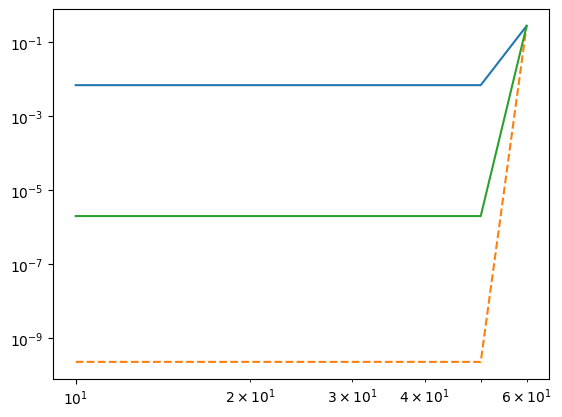

In [ ]:
#graficamos
plt.loglog(n_valores,error_trap)
plt.loglog(n_valores,error_simp13, '--')
plt.loglog(n_valores,error_punto_medio)

Concluimos que el metodo de simpson es el mejor

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_ext(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    t=(b-a)*0.5*x+0.5*(a+b)
    integral = ((b-a)*0.5)*np.sum(w*func(t))
    return integral


In [ ]:
a,b=np.e,1+np.e
g= lambda x: 1/(x*np.log(x))
gauss_quad_ext(g,3)

0.2725124447898104

#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [ ]:
import sympy as sp
from scipy.optimize import newton, root_scalar
x = sp.Symbol('x')

In [ ]:
x_num=np.linspace(-5,5,100)

In [ ]:
#grado 3
P3 = sp.legendre(3,x)
dP3= sp.diff(P3,x)

#grado 4
P4= sp.legendre(4,x)
dP4= sp.diff(P4,x)

#convertir a numericas
P3_num = sp.lambdify(x, P3, 'numpy')
dP3_num = sp.lambdify(x, dP3, 'numpy')
P4_num = sp.lambdify(x, P4, 'numpy')
dP4_num = sp.lambdify(x, dP4, 'numpy')

In [ ]:
  P3

5*x**3/2 - 3*x/2

In [ ]:
P4

35*x**4/8 - 15*x**2/4 + 3/8

In [ ]:
#raices

def raices(P_num,dP,intentos):
  for i in range(len(intentos)):
    raiz_newton=newtom(P_num,intentos[i],fprime=dP_num)
    raiz_secante=root_scalar(P_num,x0=x[i],x1=x[i]+0.1)

    return raiz_newton,'newton' ,'y ', raiz_secante, 'secante'

In [ ]:
raices(P3,dP3,100)

TypeError: object of type 'int' has no len()